In [1]:
import math
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import missingno as msno
import matplotlib.pyplot as plt
from tensorflow.python import metrics

#ganti separator ";" buat biar bisa diakses
data = pd.read_csv('data_arrhythmia.csv', sep=';', engine='python')

#replace null data with Nan biar ke detech
data = data.replace('?', np.NaN)

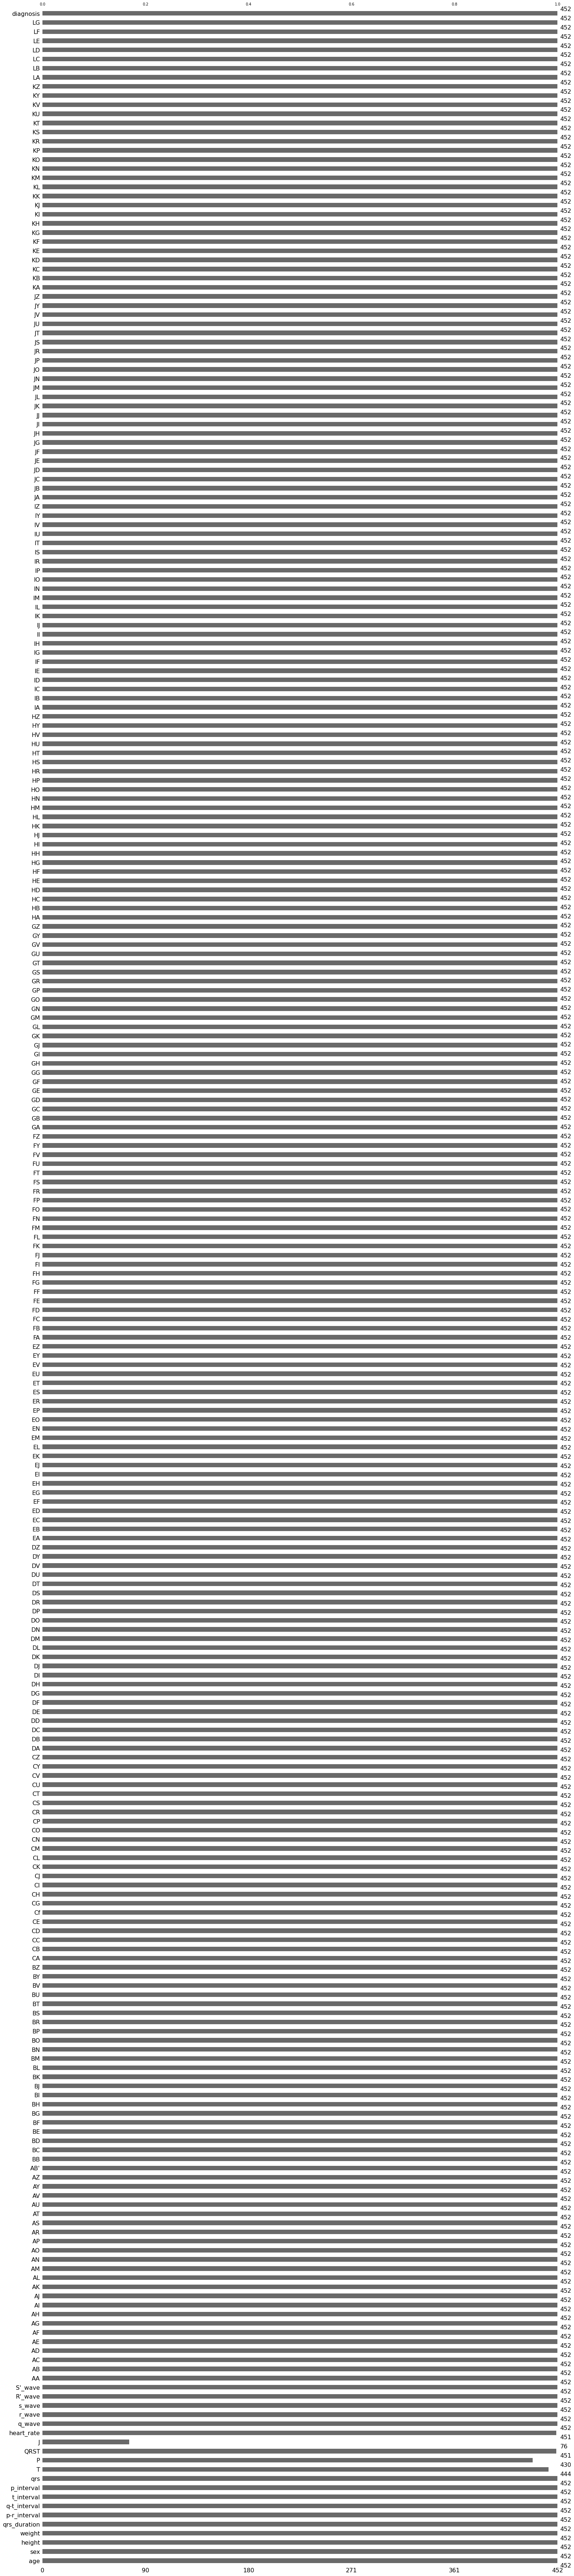

In [2]:
#bar all missing value data
msno.bar(data)

Text(0, 0.5, 'null')

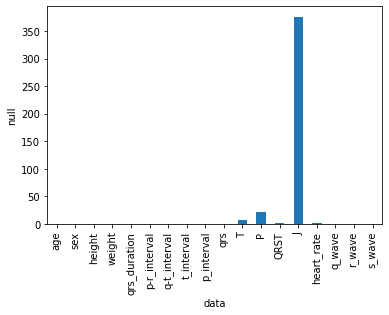

In [3]:
#bar plot untuk memperjelas bar diatas
nullValue = pd.isnull(data).sum()[0:18].plot(kind="bar")
plt.xlabel('data')
plt.ylabel('null')

In [4]:
#mengganti data Nan menjadi mean
missingCol = ['T', 'P', 'QRST', 'J','heart_rate']
for i in missingCol:
    data.loc[data.loc[:, i].isnull(), i] = data.loc[:, i].median()

In [5]:
#menyederhanakan proses klasifikasi pada diagnosis
for i in range(len(data['diagnosis'])):
    if ((data['diagnosis'][i]) == 1):
        data = data.replace(to_replace = data['diagnosis'][i], value= 1)
    elif ((data['diagnosis'][i] > 1) and (data['diagnosis'][i] <= 15)):
        data = data.replace(to_replace = data['diagnosis'][i], value= 2)
    else:
        data.replace(to_replace = data['diagnosis'][i], value= 16, regex = True)

In [6]:
#split data training
nTrain = math.floor(len(data) * 0.7)
newData = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,20,28,29,32,40,44,51]]
dataTrainX = newData[:nTrain].values
dataTrainY = data["diagnosis"][:nTrain].values
dataTrainX = np.asarray(dataTrainX).astype(np.float32)    
dataTrainY = np.asarray(dataTrainY).astype(np.float32)

#split data test
dataTestX = newData[nTrain:len(newData)].values
dataTestY = data["diagnosis"][nTrain:len(newData)]
dataTestX = np.asarray(dataTestX).astype(np.float32)
dataTestY = np.asarray(dataTestY).astype(np.float32)

In [7]:
print(dataTestX.shape)
print(dataTrainX.shape)
print(len(dataTrainX) + len(dataTestX))

(136, 22)
(316, 22)
452


In [8]:
print(newData[:].keys())

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs', 'T', 'P', 'QRST',
       'heart_rate', 'r_wave', 'AA', 'AI', 'AJ', 'AM', 'AV', 'BB', 'BI'],
      dtype='object')


In [9]:
#model
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(units = 11, input_shape=[22]  ,activation='relu'),
     tf.keras.layers.Dense(units = 11, input_shape=[22]  ,activation='relu'),
     tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model.compile(
    loss = 'mae',
    optimizer = 'nadam',
    metrics = ['accuracy']
)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 1.4936 - accuracy: 0.3060 - val_loss: 0.8869 - val_accuracy: 0.4583
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1110 - accuracy: 0.5448 - val_loss: 0.8520 - val_accuracy: 0.4792
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0750 - accuracy: 0.5672 - val_loss: 0.8126 - val_accuracy: 0.5000
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0667 - accuracy: 0.5672 - val_loss: 0.8110 - val_accuracy: 0.5000
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0634 - accuracy: 0.5672 - val_loss: 0.7938 - val_accuracy: 0.5000
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0598 - accuracy: 0.5672 - val_loss: 0.7922 - val_accuracy: 0.5000
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0598 - accuracy: 0.5672 - val_loss: 0.7920 - val_accuracy: 0.5000
Epoch 8/100
9/9 [=========

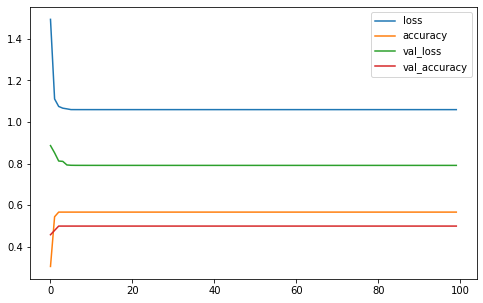

In [10]:
#training
history = model.fit(
    dataTrainX, dataTrainY, epochs=100, validation_split=0.15, shuffle=True
)

#plot optimizer
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [11]:
# evaluasi data train
_, accuracy = model.evaluate(dataTrainX[:int(len(data)/2)], dataTrainY[:int(len(data)/2)])
print(f'Accuracy: {accuracy*100} %' )

8/8 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.5619
Accuracy: 56.194692850112915 %


In [12]:
#predict (testing)
predict = model.predict(dataTestX)
pd.DataFrame(list(zip(dataTestY, predict)), columns=['Actual', 'Predicted'])


5/5 [==============================] - 0s 2ms/step


,Actual,Predicted
0,2.0,[1.0]
1,1.0,[1.0]
2,1.0,[1.0]
3,2.0,[1.0]
4,2.0,[0.99641854]
...,...,...
131,1.0,[1.0]
132,2.0,[1.0]
133,2.0,[0.9999999]
134,1.0,[1.0]
